In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import joblib


# Đọc file CSV
df = pd.read_csv('D:/code/python/project_prediction_stock_meta/META.csv')

# Hiển thị thông tin cơ bản về dữ liệu
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,28/10/2021,312.989990,325.519989,308.109985,316.920013,316.584106,50806800
1,29/10/2021,320.190002,326.000000,319.600006,323.570007,323.227051,37059400
2,01/11/2021,326.040009,333.450012,326.000000,329.980011,329.630280,31518900
3,02/11/2021,331.380005,334.790009,323.799988,328.079987,327.732269,28353000
4,03/11/2021,327.489990,332.149994,323.200012,331.619995,331.268524,20786500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       633 non-null    object 
 1   Open       633 non-null    float64
 2   High       633 non-null    float64
 3   Low        633 non-null    float64
 4   Close      633 non-null    float64
 5   Adj Close  633 non-null    float64
 6   Volume     633 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ KB


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,633.000000,633.000000,633.000000,633.000000,633.000000,6.330000e+02
mean,261.061059,265.220806,257.388010,261.293871,261.060386,2.771392e+07
std,107.441371,108.406688,106.236579,107.356451,107.335771,1.900435e+07
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06
25%,172.750000,176.490005,171.429993,173.419998,173.236191,1.772430e+07
50%,238.449997,241.690002,235.520004,238.559998,238.307144,2.306600e+07
75%,326.200012,332.329987,322.720001,327.640015,327.292755,3.142390e+07
max,529.280029,531.489990,518.890015,527.340027,527.340027,2.323166e+08


In [4]:
# Chuyển đổi cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

C:\Users\Quang Huy\AppData\Local\Temp\ipykernel_18676\2317505028.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


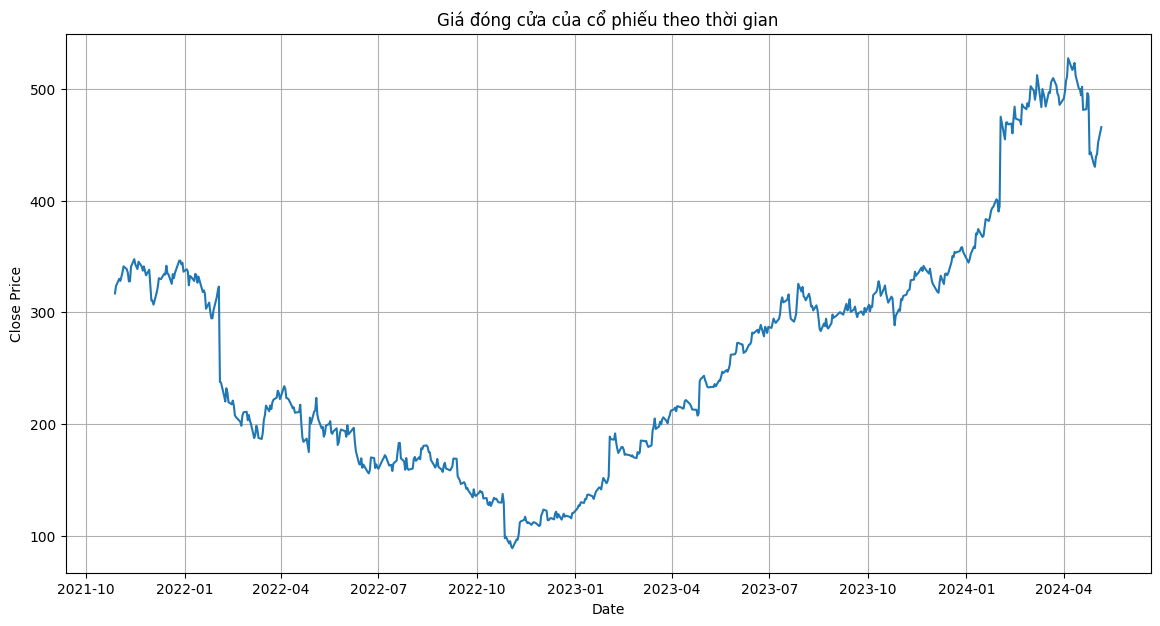

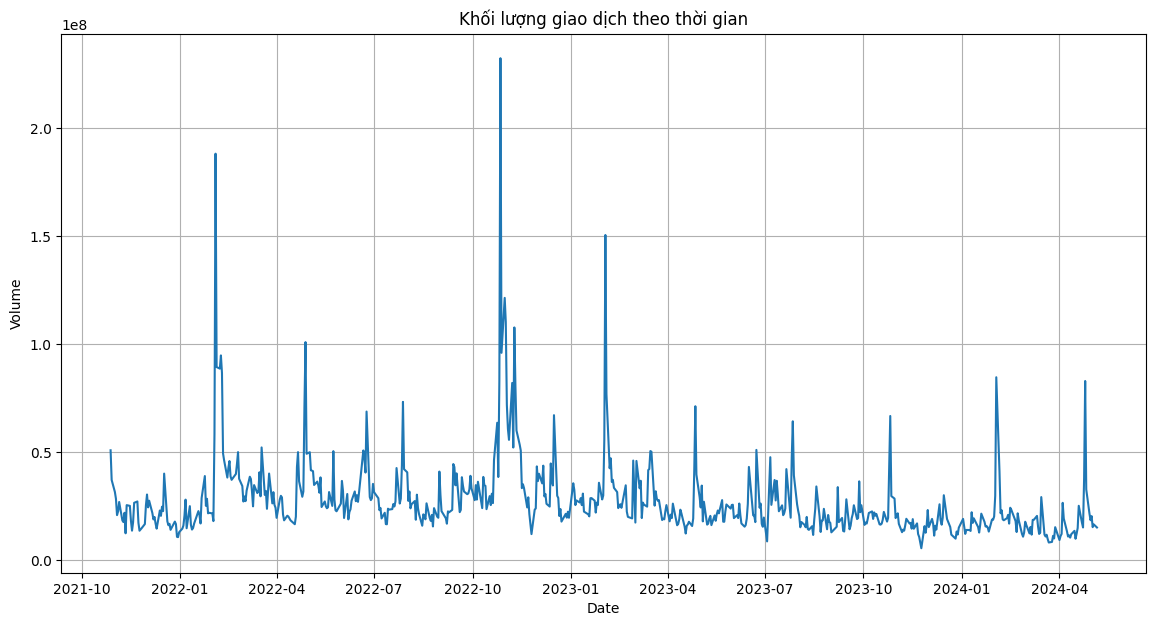

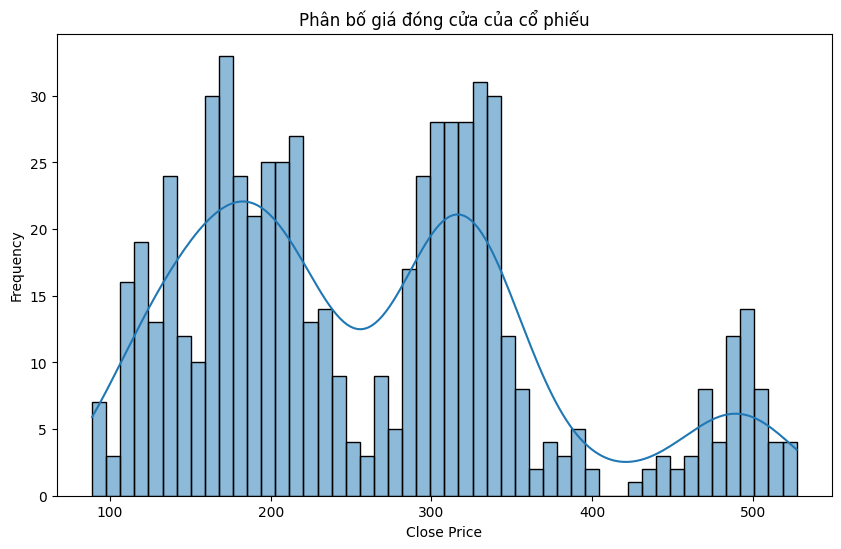

In [5]:
# Trực quan hóa giá cổ phiếu theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Giá đóng cửa của cổ phiếu theo thời gian')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.savefig('image/closing_price_trend.png')
plt.show()

# Trực quan hóa biểu đồ khối lượng giao dịch
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'])
plt.title('Khối lượng giao dịch theo thời gian')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig('image/volume_trend.png')
plt.show()

# Trực quan hóa biểu đồ phân bố giá đóng cửa
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Phân bố giá đóng cửa của cổ phiếu')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.savefig('image/close_price_distribution.png')
plt.show()


In [6]:
# Chuẩn bị dữ liệu
features = df[['Open', 'High', 'Low', 'Volume']]
labels = df['Close']


In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [8]:
# Khởi tạo và huấn luyện mô hình Decision Tree Regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
# Dự đoán và đánh giá mô hình
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.820942072401422


In [10]:
# Lưu mô hình
joblib.dump(model, 'decision_tree_stock_price_model.pkl')

['decision_tree_stock_price_model.pkl']

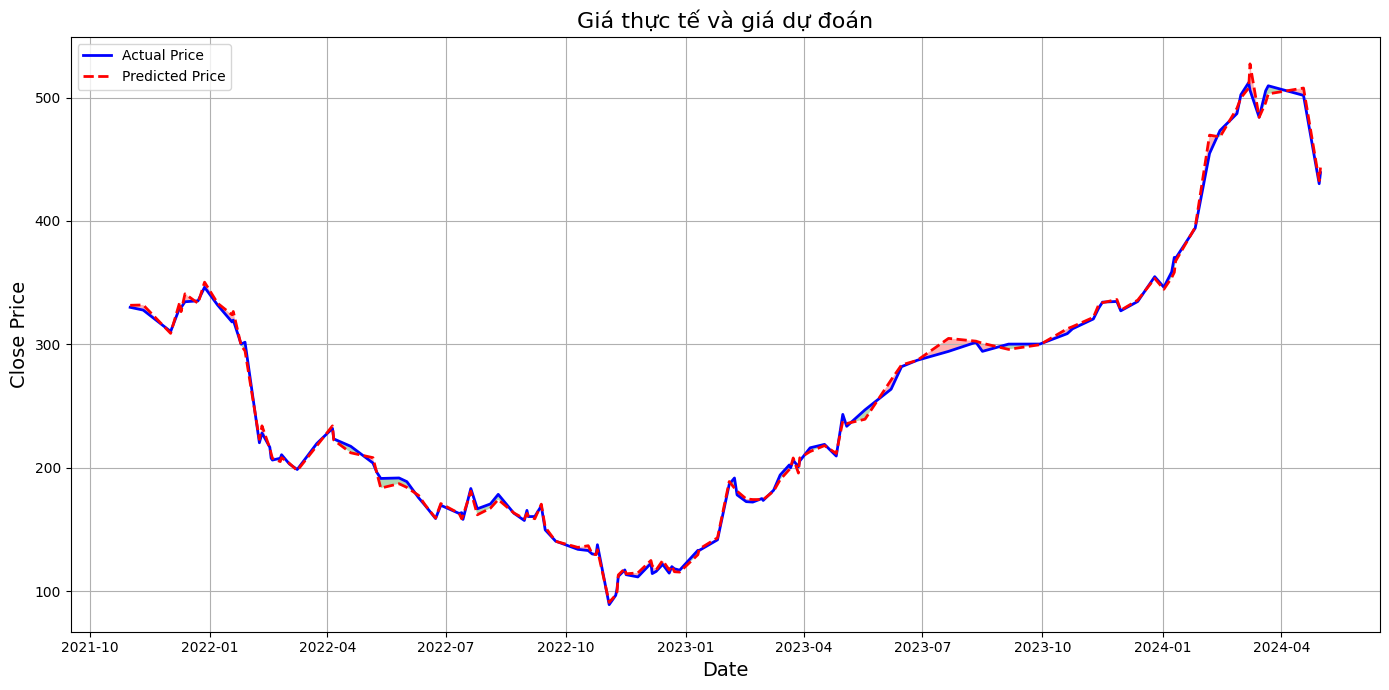

In [20]:
# Tạo một DataFrame cho giá trị thực tế và giá trị dự đoán để dễ quản lý
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)

# Sắp xếp DataFrame theo thời gian để biểu đồ dễ nhìn hơn
pred_df.sort_index(inplace=True)

# Trực quan hóa giá thực tế và giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(pred_df.index, pred_df['Actual'], color='blue', label='Actual Price', linewidth=2)
plt.plot(pred_df.index, pred_df['Predicted'], color='red', linestyle='--', label='Predicted Price', linewidth=2)
plt.fill_between(pred_df.index, pred_df['Actual'], pred_df['Predicted'], where=(pred_df['Actual'] > pred_df['Predicted']), facecolor='green', alpha=0.3, interpolate=True)
plt.fill_between(pred_df.index, pred_df['Actual'], pred_df['Predicted'], where=(pred_df['Actual'] < pred_df['Predicted']), facecolor='red', alpha=0.3, interpolate=True)
plt.title('Giá thực tế và giá dự đoán', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('image/dst_actual_vs_predicted_improved.png')
plt.show()